# 9.9 전이학습
* 전이학습에서 사전훈련(pre-training)으로 더 자주 쓰임

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [2]:
pre_trained_model = InceptionV3(input_shape=(75, 75, 3), 
                                include_top=False, weights='imagenet') # top은 header 부분을 의미

In [3]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[

# 레이어 동결

In [4]:
# 학습을 하지 않도록 설정
for layer in pre_trained_model.layers:
    layer.trainable = False 

In [5]:
pre_trained_model.layers[1].trainable

False

# 새로운 헤더 작업

In [12]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

x = Flatten()(last_output)
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x) # mnist 데이터셋의 클래스가 10개이므로

# lr : learning rate , 동결이 풀려있는 상태에서 학습률을 더 낮게 설정
model = Model(pre_trained_model.input, outputs)
model.compile(optimizer=RMSprop(lr=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[0][0]

In [13]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
import cv2

x_train_75 = []
for image in x_train[:10000]:
    x_train_75.append(cv2.resize(image, (75, 75)))
x_train_75 = np.array(x_train_75)

x_test_75 = []
for image in x_test[:2000]:
    x_test_75.append(cv2.resize(image, (75, 75)))
x_test_75 = np.array(x_train_75)

x_train_75 = np.stack((x_train_75,x_train_75,x_train_75), axis=-1)
x_test_75 = np.stack((x_test_75,x_test_75,x_test_75), axis=-1)

x_train_sc = x_train_75 / 255
x_test_sc = x_test_75 / 255

x_train_sc = x_train_sc.astype('float32')
x_test_sc = x_test_sc.astype('float32')

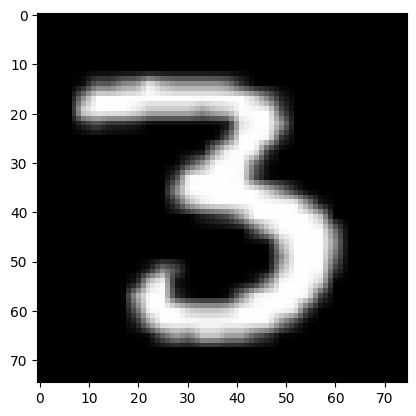

In [16]:
plt.imshow(x_train_sc[12])
plt.show()

In [17]:
y_train_sc = y_train[:10000].copy()
y_test_sc = y_test[:2000].copy()
history = model.fit(x_train_sc, y_train_sc, epochs=20, validation_split=0.2)

Epoch 1/20
250/250 [==============================] - 11s 29ms/step - loss: 0.3200 - accuracy: 0.9084 - val_loss: 0.1695 - val_accuracy: 0.9505
Epoch 2/20
250/250 [==============================] - 6s 24ms/step - loss: 0.0880 - accuracy: 0.9709 - val_loss: 0.1367 - val_accuracy: 0.9605
Epoch 3/20
250/250 [==============================] - 6s 24ms/step - loss: 0.0598 - accuracy: 0.9794 - val_loss: 0.0749 - val_accuracy: 0.9770
Epoch 4/20
250/250 [==============================] - 6s 24ms/step - loss: 0.0442 - accuracy: 0.9864 - val_loss: 0.0616 - val_accuracy: 0.9800
Epoch 5/20
250/250 [==============================] - 6s 24ms/step - loss: 0.0337 - accuracy: 0.9881 - val_loss: 0.1332 - val_accuracy: 0.9605
Epoch 6/20
250/250 [==============================] - 6s 24ms/step - loss: 0.0248 - accuracy: 0.9924 - val_loss: 0.0538 - val_accuracy: 0.9815
Epoch 7/20
250/250 [==============================] - 6s 24ms/step - loss: 0.0203 - accuracy: 0.9944 - val_loss: 0.0724 - val_accuracy: 0.977

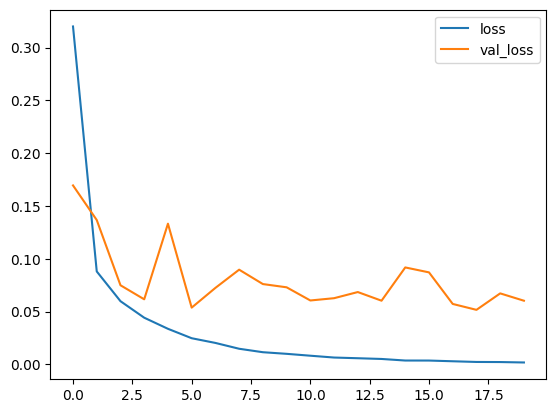

In [19]:
plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

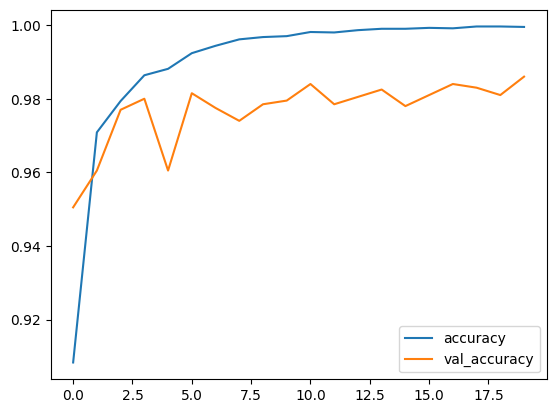

In [20]:
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()